In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

# S02L01 Strings and Arrays

In [3]:
def is_palindrome(s):
    lo,hi = 0,len(s)-1
    while lo<hi:
        if s[lo]!=s[hi]:
            return False
        else:
            lo,hi=lo+1,hi-1
    return True

In [5]:
for s in ['abcba','abccba','abc','abca','a','']:
    print('\''+s+'\'','is palindrome?',is_palindrome(s))

'abcba' is palindrome? True
'abccba' is palindrome? True
'abc' is palindrome? False
'abca' is palindrome? False
'a' is palindrome? True
'' is palindrome? True


# S02L02 Matrices

In [6]:
def nullify_rows_cols(m):
    r,c = m.shape
    null_rows = np.zeros(r,dtype=bool)
    null_cols = np.zeros(c,dtype=bool)
    for i in range(r):
        for j in range(c):
            if m[i,j]==0:
                null_rows[i]=True
                null_cols[j]=True
    for i in range(r):
        for j in range(c):
            if null_rows[i] or null_cols[j]:
                m[i,j]=0
    return m

In [7]:
m = np.reshape(range(1,21),(4,5))
m[0,4]=0
m[2,4]=0
m

array([[ 1,  2,  3,  4,  0],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14,  0],
       [16, 17, 18, 19, 20]])

In [6]:
nullify_rows_cols(m)

array([[ 0,  0,  0,  0,  0],
       [ 6,  7,  8,  9,  0],
       [ 0,  0,  0,  0,  0],
       [16, 17, 18, 19,  0]])

# S02L03 Dictionaries

In [7]:
def same_char_count(s1,s2):
    char_count = {}
    for c in s1:
        char_count[c] = char_count.get(c,0)+1
    for c in s2:
        char_count[c] = char_count.get(c,0)-1
    return set(char_count.values())=={0}

In [8]:
s1 = 'abababac'
s2 = 'caaabbbac'
s3 = 'aaaabbbc'
for si in [s1,s2,s3]:
    for sj in [s1,s2,s3]:
        print(si,sj,same_char_count(si,sj))

abababac abababac True
abababac caaabbbac False
abababac aaaabbbc True
caaabbbac abababac False
caaabbbac caaabbbac True
caaabbbac aaaabbbc False
aaaabbbc abababac True
aaaabbbc caaabbbac False
aaaabbbc aaaabbbc True


# S02L04 Linked Lists

In [9]:
class LLNode():
    def __init__(self,val):
        self.next = None
        self.val = val
        
def print_llist(root,num_steps):
    iterator = root
    for _ in range(num_steps):
        print(iterator.val,end=' ')
        if iterator.next is not None:
            iterator = iterator.next
        else:
            break
    print()

In [10]:
def check_for_loop(root):
    slow,fast=root,root
    while True:
        if fast.next is None or fast.next.next is None:
            return False
        slow = slow.next
        fast = fast.next.next
        if slow==fast:
            return True

In [11]:
root_no_loop = LLNode(0)
iterator = root_no_loop
for i in range(1,6):
    new_node = LLNode(i)
    iterator.next = new_node
    iterator = iterator.next
#
print_llist(root_no_loop,30)
#
print('Is there a loop?',check_for_loop(root_no_loop))

0 1 2 3 4 5 
Is there a loop? False


In [12]:
root_loop = LLNode(0)
iterator = root_loop
for i in range(1,6):
    new_node = LLNode(i)
    iterator.next = new_node
    iterator = iterator.next
iterator.next = root_loop.next.next.next
#
print_llist(root_loop,30)
#
print('is there a loop?',check_for_loop(root_loop))

0 1 2 3 4 5 3 4 5 3 4 5 3 4 5 3 4 5 3 4 5 3 4 5 3 4 5 3 4 5 
is there a loop? True


# S02L05 Recursion

Write a method that implements the 'paint fill' in a matrix representing an image.                             
That is, given a matrix, a new color value and a couple of coordinates (x,y),              
matrix[x,y] and all adjacent cells with the same color/value must be filled with the new color value. 

In [13]:
def paint_fill(matrix,r,c,new_col,prev_col):
    matrix[r,c] = new_col
    if r>0 and matrix[r-1,c] == prev_col:
        paint_fill(matrix,r-1,c,new_col,prev_col)
    if r<matrix.shape[0]-1 and matrix[r+1,c] == prev_col:
        paint_fill(matrix,r+1,c,new_col,prev_col)
    if c>0 and matrix[r,c-1] == prev_col:
        paint_fill(matrix,r,c-1,new_col,prev_col)
    if c<matrix.shape[1]-1 and matrix[r,c+1] == prev_col:
        paint_fill(matrix,r,c+1,new_col,prev_col)

In [14]:
cmap = matplotlib.colors.ListedColormap(['white','orangered','dodgerblue','limegreen'])

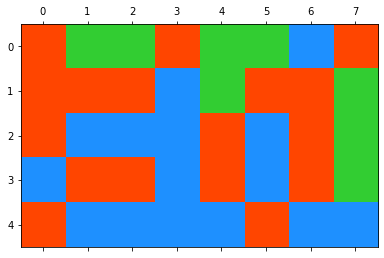

In [15]:
matrix = np.random.choice([1,2,3],(5,8))
plt.matshow(matrix,cmap=cmap,vmin=0,vmax=3);

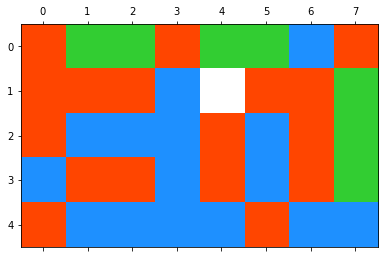

In [16]:
start_row = np.random.randint(matrix.shape[0])
start_col = np.random.randint(matrix.shape[1])
previous_color = matrix[start_row,start_col]
matrix[start_row,start_col]=0
plt.matshow(matrix,cmap=cmap,vmin=0,vmax=3);

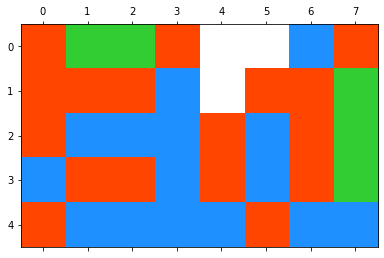

In [17]:
paint_fill(matrix,start_row,start_col,0,previous_color)
plt.matshow(matrix,cmap=cmap,vmin=0,vmax=3);

# S02L06 Fibonacci

In [18]:
def fibonacci_iterativo(n):
    if n<2:
        return n
    else:
        lo,hi = 0,1
        for _ in range(n):
            lo,hi = hi,lo+hi
        return lo

In [19]:
def fibonacci_ricorsivo(n):
    if n<2:
        return n
    else:
        return fibonacci_ricorsivo(n-2)+fibonacci_ricorsivo(n-1)

In [20]:
print([fibonacci_iterativo(i) for i in range(10)])
print([fibonacci_ricorsivo(i) for i in range(10)])

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


In [21]:
for i in range(40):
    start = time.time()
    fibonacci_iterativo(i)
    time_iter = np.round(time.time()-start,3)
    start = time.time()
    fibonacci_ricorsivo(i)
    time_rec = np.round(time.time()-start,3)
    print(i,'\t',time_iter,'\t',time_rec)

0 	 0.0 	 0.0
1 	 0.0 	 0.0
2 	 0.0 	 0.0
3 	 0.0 	 0.0
4 	 0.0 	 0.0
5 	 0.0 	 0.0
6 	 0.0 	 0.0
7 	 0.0 	 0.0
8 	 0.0 	 0.0
9 	 0.0 	 0.0
10 	 0.0 	 0.0
11 	 0.0 	 0.0
12 	 0.0 	 0.0
13 	 0.0 	 0.0
14 	 0.0 	 0.0
15 	 0.0 	 0.0
16 	 0.0 	 0.0
17 	 0.0 	 0.0
18 	 0.0 	 0.001
19 	 0.0 	 0.001
20 	 0.0 	 0.002
21 	 0.0 	 0.003
22 	 0.0 	 0.005
23 	 0.0 	 0.007
24 	 0.0 	 0.012
25 	 0.0 	 0.019
26 	 0.0 	 0.031
27 	 0.0 	 0.05
28 	 0.0 	 0.08
29 	 0.0 	 0.132
30 	 0.0 	 0.214
31 	 0.0 	 0.345
32 	 0.0 	 0.55
33 	 0.0 	 0.899
34 	 0.0 	 1.448
35 	 0.0 	 2.353
36 	 0.0 	 3.823
37 	 0.0 	 6.146
38 	 0.0 	 9.936
39 	 0.0 	 16.125


In [22]:
#fibonacci_ricorsivo(67)  >100 years..

In [23]:
fibonacci_iterativo(67)

44945570212853

# S02L07 Trees

In [25]:
class TreeNode():
    def __init__(self,val):
        self.val = val
        self.left = None
        self.right = None

In [26]:
def find_lca(root,n1,n2):
    if root.val>n1 and root.val>n2:
        return find_lca(root.left,n1,n2)
    elif root.val<n1 and root.val<n2:
        return find_lca(root.right,n1,n2)
    else:
        return root.val

In [27]:
root = TreeNode(10)
root.left = TreeNode(5)
root.right = TreeNode(15)
root.left.left = TreeNode(2)
root.left.right = TreeNode(8)
root.right.left = TreeNode(12)
root.right.right = TreeNode(18)

In [28]:
print('\t    10\n    5\t\t    15\n2\t8\t12\t18')

	    10
    5		    15
2	8	12	18


In [29]:
n1 = np.random.choice([2,5,8,10,12,15,18])
n2 = np.random.choice([2,5,8,10,12,15,18])
print('The LCA of',n1,'and',n2,'is',find_lca(root,n1,n2))

The LCA of 18 and 10 is 10


# S02L08 Dynamic Programming

In [30]:
def cover_distance(n):
    num_of_options = np.zeros(n+1,dtype=int)
    num_of_options[:3] = [1,1,2]
    for itr in range(3,n+1):
        num_of_options[itr] = sum(num_of_options[itr-3:itr])
    return num_of_options

In [31]:
cover_distance(10)

array([  1,   1,   2,   4,   7,  13,  24,  44,  81, 149, 274])